In [ ]:
# Author: Brandon Botzer
# Date: 3/30/2024
# Class: Penn State - AI 879

Tasks:

    Problem:

    Take a set of at least five pictures of an object from a slightly different angle (preferably 15 degrees between the pictures). Calculate the distance to the object in different pairs of consecutive pictures by triangulation and compare the result to the distance observed. Show the result.
    Note: if you get receiving an undefined variable error for 'storedParams', you should build your own “stereoParameters” object using the following: parameters for the camera, offset of the camera when you took the pictures, and a true representation of the object of interest. To determine the parameters of the camera ("cameraParameters"), use the images that you have taken. On each of these images, select a number of corresponding points that reflect the object of interest (It can be some corners, or center of a circle, etc)  and build the corresponding matrices with their positions. Similarly, mark the corresponding points  in the true representation of the object of interest and save it in its own matrix. Having this, you can build the “cameraParameters” object.using the two generated matrices. To create the “stereoParameters” object, make sure that you measure the offset and rotation of the camera positions With this object, you can triangulate. Look into the examples on the following MATLAB pages:  "triangulate", "stereoParameters" and "cameraParameters".

    A better option is to train your cameraParameters on a checkered pattern.

Links to an external site.", "stereoParameters Links to an external site." and "cameraParameters Links to an external site.".
A better option is to train your "cameraParameters Links to an external site." object on a checkered pattern.

In [1]:
# Imports for functions

from PIL import Image

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2


# Showing the results of scipy computations
import pandas as pd

cv2.__version__, ski.__version__

('4.8.1', '0.22.0')

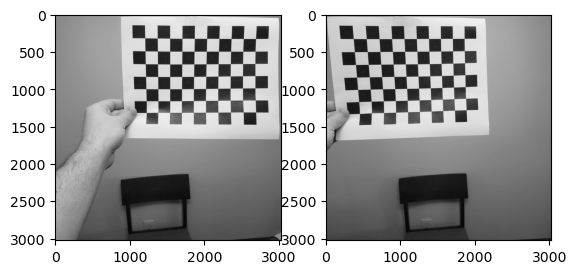

In [7]:
# Read in the two clock images from the online class notes
# im1_o = ski.io.imread('calibration/calibrate_S.jpg', as_gray=True)
# im2_o = ski.io.imread('calibration/calibrate_R.jpg', as_gray=True)


im1_o = cv2.imread('calibration/cal_1.jpg')
im1_o_gray = cv2.cvtColor(im1_o, cv2.COLOR_BGR2GRAY)
im2_o = cv2.imread('calibration/cal_2.jpg')
im2_o_gray = cv2.cvtColor(im2_o, cv2.COLOR_BGR2GRAY)

# Scale down to improve
rescale_size = (500, 500)

fig, ax = plt.subplots(1,2)
ax[0].imshow(im1_o_gray, cmap='gray')

ax[1].imshow(im2_o_gray, cmap='gray')

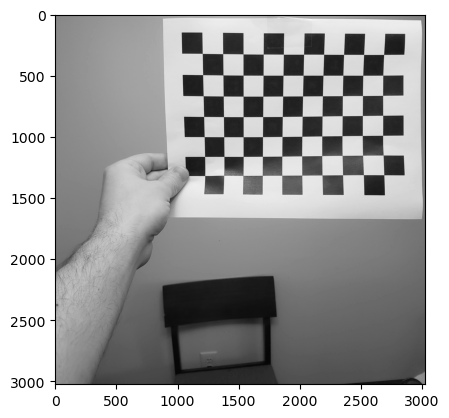

In [8]:
plt.imshow(im1_o_gray, cmap='gray')

In [9]:
# The step 1 of calibrating the camera (at both positions!)

import numpy as np
import cv2
import glob

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ..., (6,5,0)
objp = np.zeros((11*7,3), np.float32)
objp[:,:2] = np.mgrid[0:11,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Load calibration images
images = glob.glob('calibration/*.jpg')



In [3]:
images[0]

'calibration\\cal_1.jpg'

In [22]:
# ret, corners = cv2.findChessboardCorners(im1_o_gray, (7,6))

In [4]:
# ret

In [10]:

# Iterate through calibration images
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (11,7), cv2.CALIB_CB_ADAPTIVE_THRESH)
    # cv2.findChessboardCorners(gray, (11,7), None)

    # If corners are found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display corners
        img = cv2.drawChessboardCorners(img, (7,6), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()


In [11]:
objpoints, imgpoints

([], [])

In [ ]:

# Perform camera calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Print calibration results
print("Camera Matrix:")
print(mtx)
print("\nDistortion Coefficients:")
print(dist)

# Save calibration parameters for later use
np.savez('camera_calibration_params.npz', mtx=mtx, dist=dist)


In [ ]:
import cv2
import numpy as np

# Step 1: Camera Calibration
# Load calibration data or calibrate using a chessboard pattern

# Step 2: Rectify the Images
# Load the images
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

# Load calibration parameters (intrinsic and extrinsic)
# This can be obtained from camera calibration or stereo calibration
# stereoRectify will provide rectification matrices and disparity-to-depth mapping matrix
# Note: You may also need to specify the baseline distance between the cameras
R1, R2, P1, P2, Q, _, _ = cv2.stereoRectify(
    cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, imageSize, R, T)

# Rectify the images
map1, map2 = cv2.initUndistortRectifyMap(cameraMatrix1, distCoeffs1, R1, P1, imageSize, cv2.CV_16SC2)
rectified_img1 = cv2.remap(img1, map1, map2, cv2.INTER_LINEAR)
rectified_img2 = cv2.remap(img2, map1, map2, cv2.INTER_LINEAR)

# Step 3: Compute Disparity Map
# Perform stereo matching to compute the disparity map
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(rectified_img1, rectified_img2)

# Step 4: Calculate Depth Map
# Compute the depth map using the disparity map and Q matrix
depth_map = cv2.reprojectImageTo3D(disparity, Q)

# Now you can extract depth information from the depth map
# For example, get depth at a specific pixel location (x, y)
x, y = 100, 100
depth = depth_map[y, x]

print("Depth at pixel ({}, {}): {:.2f} meters".format(x, y, depth[2]))


Triangulation Methods:
http://users.cecs.anu.edu.au/~hartley/Papers/triangulation/triangulation.pdf